#### Name : Kalyani Dhawade
#### Class : TE 4 [ K - 4 ]
#### Roll No. : 31416

## Data Analytics I 

##### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. 
##### The objective is to predict the value of prices of the house using the given features.

crim : per capita crime rate by town.

zn : proportion of residential land zoned for lots over 25,000 sq.ft.

indus : proportion of non-retail business acres per town.

chas : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox : nitrogen oxides concentration (parts per 10 million).

rm : average number of rooms per dwelling.

age : proportion of owner-occupied units built prior to 1940.

dis : weighted mean of distances to five Boston employment centres.

rad : index of accessibility to radial highways.

tax : full-value property-tax rate per \$10,000.

ptratio : pupil-teacher ratio by town.

black : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat : lower status of the population (percent).

medv : median value of owner-occupied homes in \$1000s.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [35]:
df = pd.read_csv('BostonHousing.csv')
df1 = df.copy()
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [36]:
df.shape

(506, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [38]:
df.isnull().sum().sum()

0

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


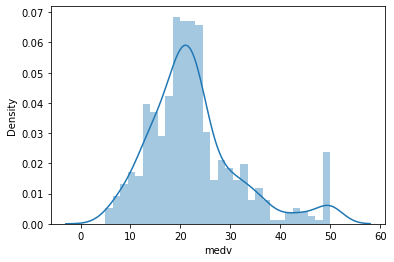

In [39]:
sns.distplot(df['medv'], bins = 30)
plt.show()

#### Correlation
Correlation is a method of determining the correspondence or proportionality between two series of measures (or scores).

Correlation indicates the relationship of one variable with the other.

Correlation can vary in between perfect positive correlation and perfect negative correlation. The top of the scale will indicate perfect positive correlation and it will begin from +1 and then it will pass through zero, indicating entire absence of correlation.

<AxesSubplot:>

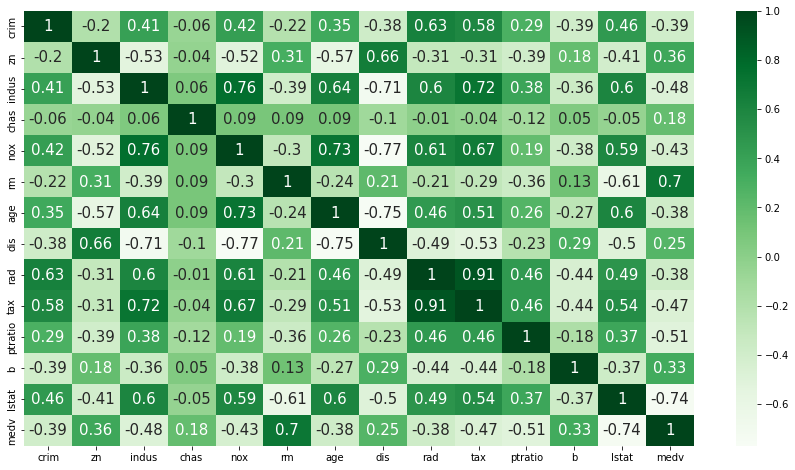

In [40]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (15,8))
sns.heatmap(data=correlation_matrix, cmap="Greens", annot_kws={'size': 15}, annot=True)

#### medv is strongly correlated to lstat, rm

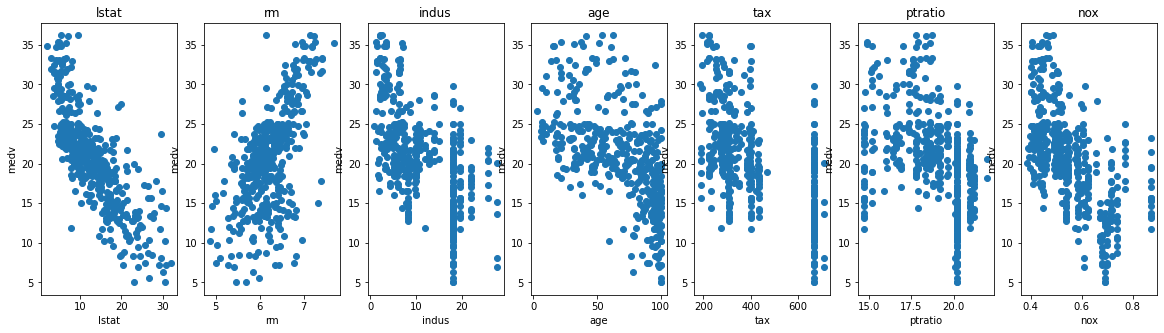

In [54]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm', 'indus','age', 'tax', 'ptratio', 'nox']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

### Checking for outliers using boxplot

<AxesSubplot:xlabel='indus'>

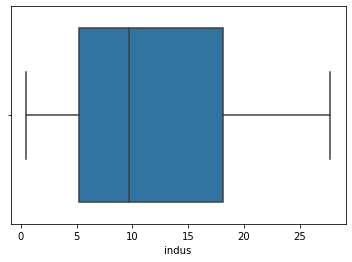

In [42]:
sns.boxplot(x = df['indus'])

<AxesSubplot:xlabel='nox'>

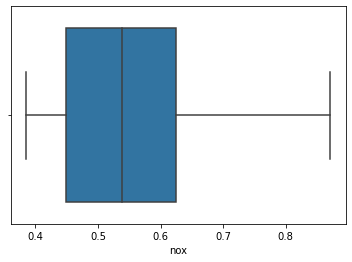

In [43]:
sns.boxplot(x = df['nox'])

<AxesSubplot:xlabel='rm'>

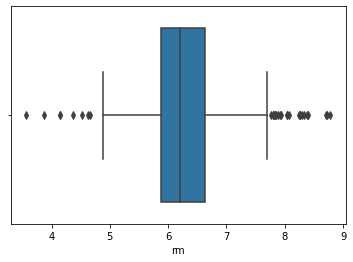

In [44]:
sns.boxplot(x = df['rm'])

<AxesSubplot:xlabel='age'>

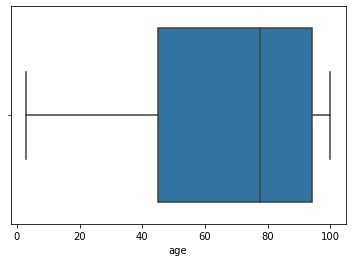

In [45]:
sns.boxplot(x = df['age'])

<AxesSubplot:xlabel='tax'>

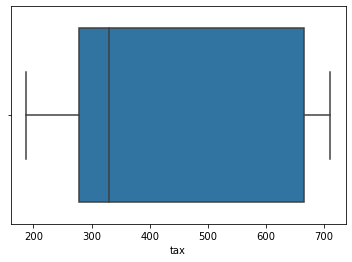

In [46]:
sns.boxplot(x = df['tax'])

<AxesSubplot:xlabel='ptratio'>

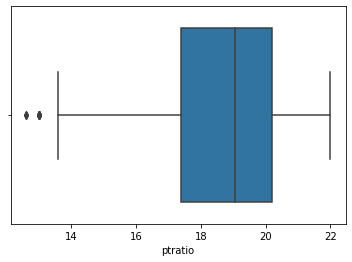

In [47]:
sns.boxplot(x = df['ptratio'])

<AxesSubplot:xlabel='lstat'>

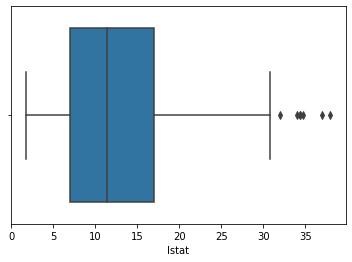

In [48]:
sns.boxplot(x = df['lstat'])

<AxesSubplot:xlabel='medv'>

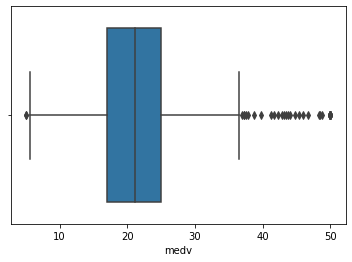

In [49]:
sns.boxplot(x = df['medv'])

### Removing outliers

In [50]:
from scipy import stats
_cols = ['rm', 'ptratio', 'lstat', 'medv']
result = stats.iqr(df[_cols], axis = 0)
result

array([ 0.738,  2.8  , 10.005,  7.975])

In [51]:
#rm
df.drop(df[df['rm'] < (df['rm'].quantile(0.25) - (1.5 * result[0]))].index, inplace = True)
df.drop(df[df['rm'] > (df['rm'].quantile(0.75) + (1.5 * result[0]))].index, inplace = True)

#ptratio
df.drop(df[df['ptratio'] < (df['ptratio'].quantile(0.25) - (1.5 * result[1]))].index, inplace = True)

#lstat
df.drop(df[df['lstat'] > (df['lstat'].quantile(0.75) + (1.5 * result[2]))].index, inplace = True)

#medv
df.drop(df[df['medv'] < (df['medv'].quantile(0.25) - (1.5 * result[3]))].index, inplace = True)
df.drop(df[df['medv'] > (df['medv'].quantile(0.75) + (1.5 * result[3]))].index, inplace = True)

In [52]:
df.shape        #originally (506, 14)     i.e. 61 records are dropped

(445, 14)

<AxesSubplot:>

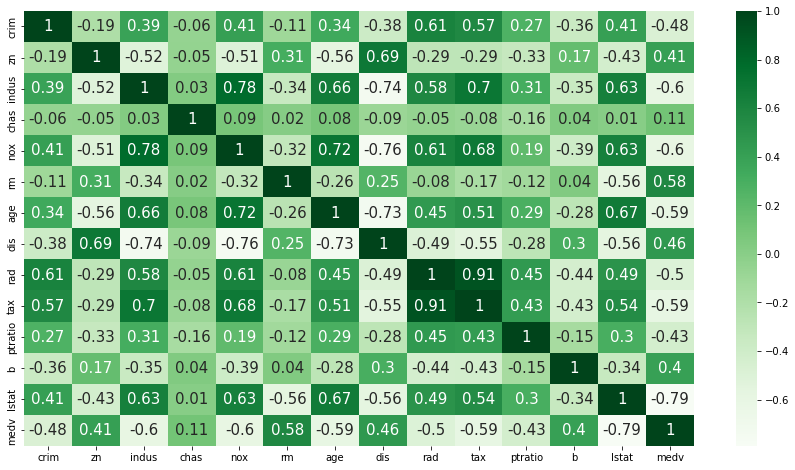

In [53]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (15,8))
sns.heatmap(data=correlation_matrix, cmap="Greens", annot_kws={'size': 15}, annot=True)

###### features = ['lstat', 'rm', 'indus','age', 'tax', 'ptratio', 'nox']

### Splitting the Dataset for Training & Testing

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# feature matrix
X = pd.DataFrame(np.c_[df["indus"], df["nox"], df["rm"], df["age"], df["tax"], df["ptratio"], df["lstat"]], columns = ["indus", "nox", "rm", "age", "tax", "ptratio", "lstat"])

# target variable
Y = df["medv"]

print("Feature Matrix X: \n", X)
print("\nTarget Variable Y:\n", Y)

Feature Matrix X: 
      indus    nox     rm   age    tax  ptratio  lstat
0     2.31  0.538  6.575  65.2  296.0     15.3   4.98
1     7.07  0.469  6.421  78.9  242.0     17.8   9.14
2     7.07  0.469  7.185  61.1  242.0     17.8   4.03
3     2.18  0.458  6.998  45.8  222.0     18.7   2.94
4     2.18  0.458  7.147  54.2  222.0     18.7   5.33
..     ...    ...    ...   ...    ...      ...    ...
440  11.93  0.573  6.593  69.1  273.0     21.0   9.67
441  11.93  0.573  6.120  76.7  273.0     21.0   9.08
442  11.93  0.573  6.976  91.0  273.0     21.0   5.64
443  11.93  0.573  6.794  89.3  273.0     21.0   6.48
444  11.93  0.573  6.030  80.8  273.0     21.0   7.88

[445 rows x 7 columns]

Target Variable Y:
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 445, dtype: float64


In [68]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(356, 7)
(89, 7)
(356,)
(89,)


### Training the Linear Regression Model

In [69]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

### Testing the Model for Error & Accuracy

#### Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. A higher value of R2 is desirable as it indicates better results. 
### R2 score for perfect model is 1.0, i.e. 100%

#### RMSE is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model.
### The lower the value, better is the performance of the model.

In [70]:
# model performance for training set
train_prediction = lin_reg_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, train_prediction)))
r2 = r2_score(Y_train, train_prediction)

print("For training dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2 * 100))

# model performance for testing set
test_prediction = lin_reg_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, test_prediction)))
r2 = r2_score(Y_test, test_prediction)

print("\nFor testing dataset:")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2 * 100))

For training dataset:
Root Mean Square Error is 3.1373898177437067
Accuracy is 75.20641472314777%

For testing dataset:
Root Mean Square Error is 3.5480314065638456
Accuracy is 64.75310445529716%


# ###

In [72]:
# feature matrix
X1 = pd.DataFrame(np.c_[df["indus"], df["nox"], df["age"], df["tax"], df["lstat"]], columns = ["indus", "nox", "age", "tax", "lstat"])

# target variable
Y1 = df["medv"]

print("Feature Matrix X1: \n", X1)
print("\nTarget Variable Y1:\n", Y1)

Feature Matrix X1: 
      indus    nox   age    tax  lstat
0     2.31  0.538  65.2  296.0   4.98
1     7.07  0.469  78.9  242.0   9.14
2     7.07  0.469  61.1  242.0   4.03
3     2.18  0.458  45.8  222.0   2.94
4     2.18  0.458  54.2  222.0   5.33
..     ...    ...   ...    ...    ...
440  11.93  0.573  69.1  273.0   9.67
441  11.93  0.573  76.7  273.0   9.08
442  11.93  0.573  91.0  273.0   5.64
443  11.93  0.573  89.3  273.0   6.48
444  11.93  0.573  80.8  273.0   7.88

[445 rows x 5 columns]

Target Variable Y1:
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 445, dtype: float64


In [81]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 5)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape)

(356, 5)
(89, 5)
(356,)
(89,)


In [82]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X1_train, Y1_train)

LinearRegression()

In [83]:
# model performance for training set
train_prediction1 = lin_reg_model.predict(X1_train)
rmse1 = (np.sqrt(mean_squared_error(Y1_train, train_prediction1)))
r2_1 = r2_score(Y1_train, train_prediction1)

print("For training dataset:")
print("Root Mean Square Error is {}".format(rmse1))
print("Accuracy is {}%".format(r2_1 * 100))

# model performance for testing set
test_prediction1 = lin_reg_model.predict(X1_test)
rmse1 = (np.sqrt(mean_squared_error(Y1_test, test_prediction1)))
r2_1 = r2_score(Y1_test, test_prediction1)

print("\nFor testing dataset:")
print("Root Mean Square Error is {}".format(rmse1))
print("Accuracy is {}%".format(r2_1 * 100))

For training dataset:
Root Mean Square Error is 3.5904991436591107
Accuracy is 67.52777691216049%

For testing dataset:
Root Mean Square Error is 3.7582030201587595
Accuracy is 60.453647335883176%
